In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#warnings.filterwarnings("ignore")
%matplotlib inline
%matplotlib notebook

In [2]:
df=pd.read_csv("first inten project.csv")

<div style= "padding: 30px ;
             color :powderblue ;
             margin : 10px ; 
             font-family: verdana; 
             font-size: 200%; 
             display:fill; 
             border: 4px solid powderblue; 
             overflow:hidden; 
             font-weight:400; 
             background-color:black ; 
             text-align:center;">
    <b>EDA</b>

</div>

In [3]:
df.head(5)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
df.shape

(36285, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [6]:
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [7]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [9]:
df.drop(["Booking_ID","date of reservation"],axis=1,inplace=True)

In [10]:
df.rename(columns={"P-C":"previously reservation canceled","P-not-C":"previously reservation not canceled"},inplace=True)

In [11]:
df.tail()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,previously reservation canceled,previously reservation not canceled,average price,special requests,booking status
36280,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,Canceled
36281,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,Not_Canceled
36282,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,Not_Canceled
36283,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,Not_Canceled
36284,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,Not_Canceled


In [12]:
df["room type"].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [13]:
df["type of meal"] = LabelEncoder().fit_transform(df["type of meal"])
df["room type"] = LabelEncoder().fit_transform(df["room type"])
df["market segment type"] = LabelEncoder().fit_transform(df["market segment type"])

In [14]:
df.head(10)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,previously reservation canceled,previously reservation not canceled,average price,special requests,booking status
0,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,Not_Canceled
1,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,Not_Canceled
2,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,Canceled
3,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,Canceled
4,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,Canceled
5,1,0,0,2,1,0,0,346,3,0,0,0,100.00,1,Canceled
6,1,1,1,4,0,0,0,34,4,0,0,0,107.55,1,Not_Canceled
7,3,0,1,3,0,0,3,83,4,0,0,0,105.61,1,Not_Canceled
8,1,1,0,4,0,0,0,121,3,0,0,0,96.90,1,Not_Canceled
9,2,0,0,5,0,0,3,44,4,0,0,0,133.44,3,Not_Canceled


<div style= "padding: 30px ;
             color :powderblue ;
             margin : 10px ; 
             font-family: verdana; 
             font-size: 200%; 
             display:fill; 
             border: 4px solid powderblue; 
             overflow:hidden; 
             font-weight:400; 
             background-color:black ; 
             text-align:center;">
    <b>visualization and ploting</b>

</div>

<IPython.core.display.Javascript object>


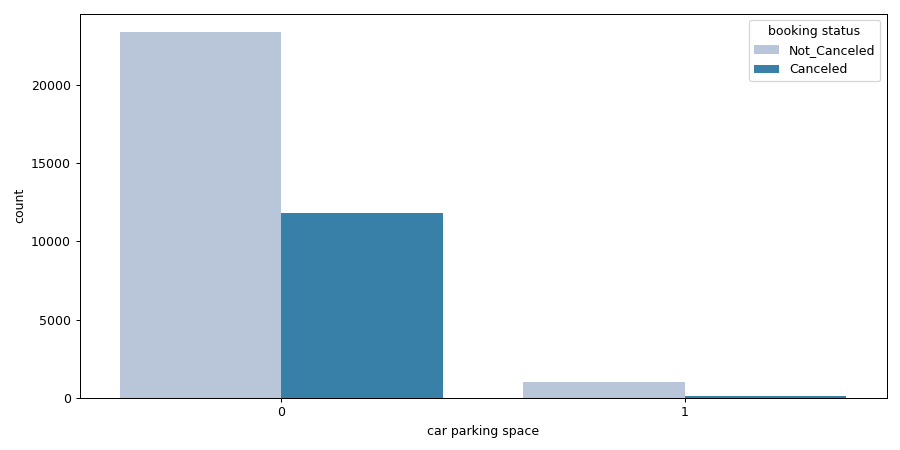

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="car parking space",hue="booking status",palette="PuBu")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


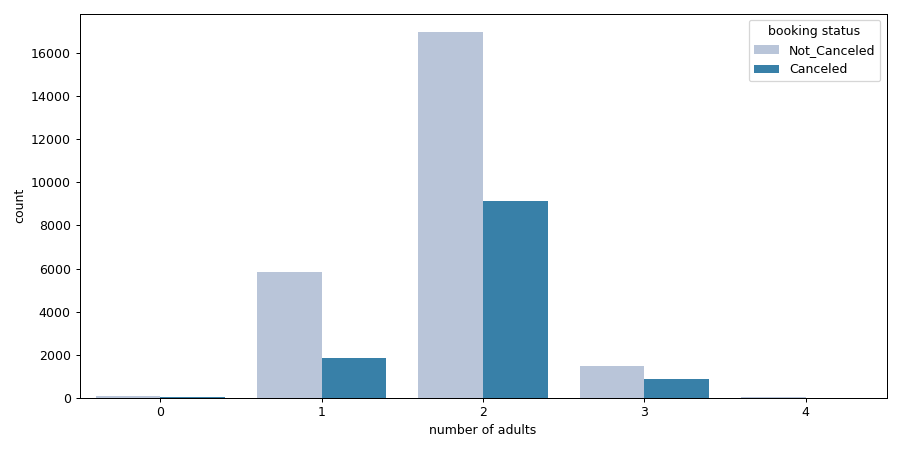

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="number of adults",hue="booking status",palette="PuBu")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


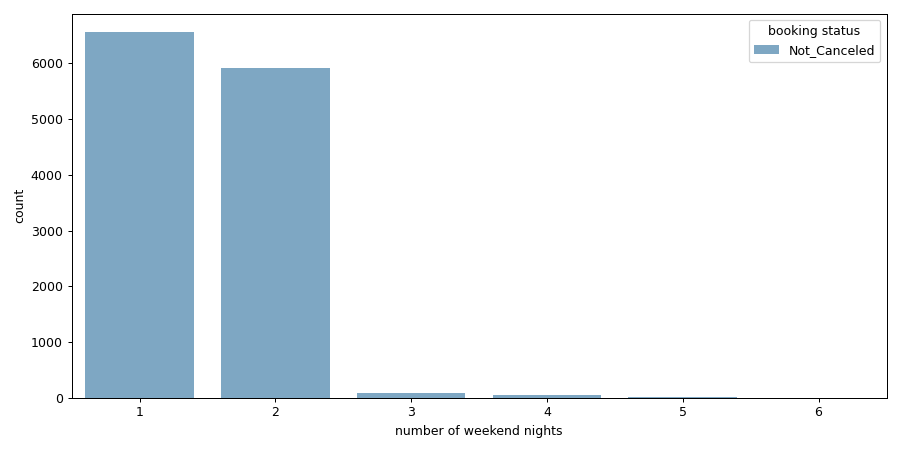

In [17]:
plt.figure(figsize=(10,5))
weekend_df=df[(df["number of weekend nights"]>0)&(df["booking status"]=="Not_Canceled")]
sns.countplot(data=weekend_df,x="number of weekend nights",hue="booking status",palette="PuBu")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


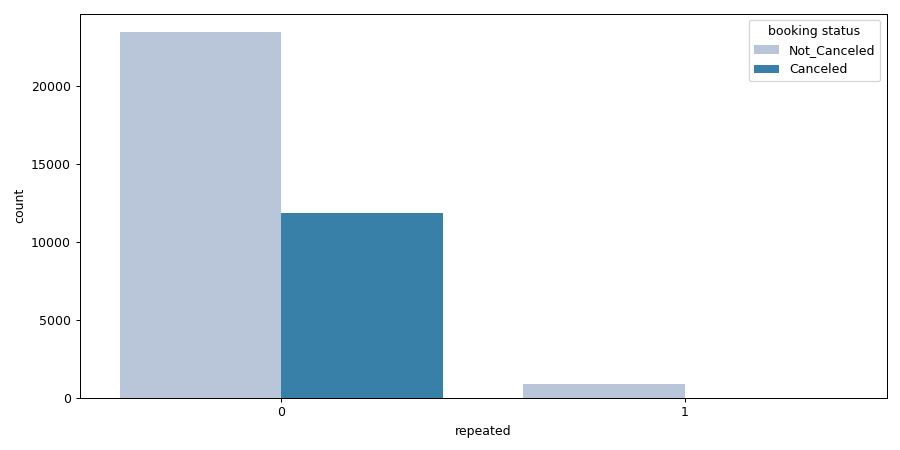

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="repeated",hue="booking status",palette="PuBu")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


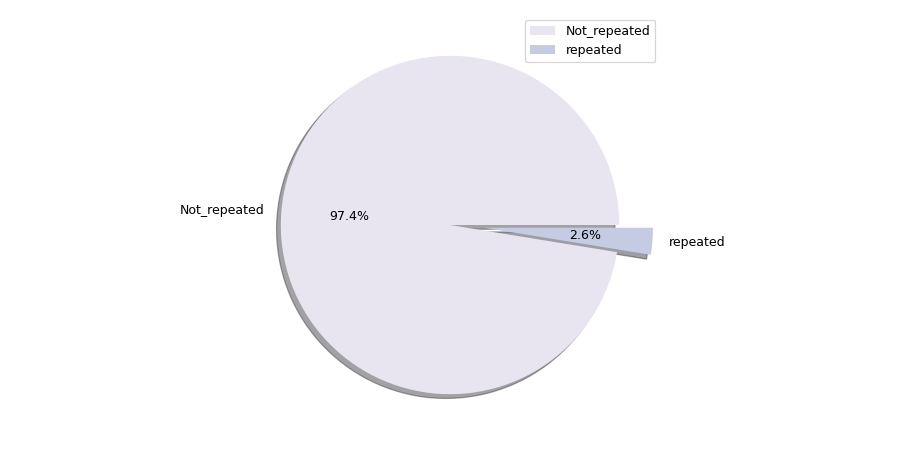

In [19]:
plt.figure(figsize=(10,5))
plt.pie(df["repeated"].value_counts(),labels=["Not_repeated","repeated"],autopct="%0.1f%%",explode=[0,0.2],shadow=True,colors=sns.color_palette("PuBu"))
plt.legend()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


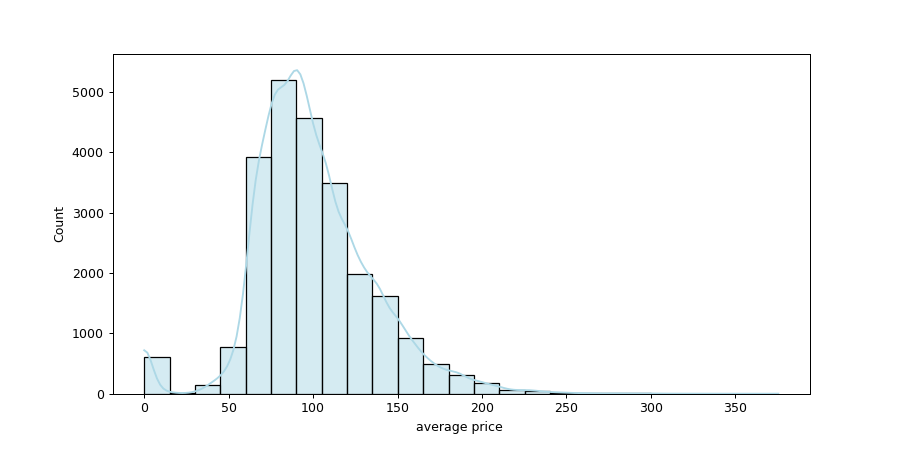

<AxesSubplot:xlabel='average price ', ylabel='Count'>

In [20]:
fig,ax=plt.subplots(figsize=(10,5))
sns.histplot(df["average price "][df["booking status"]=="Not_Canceled"],bins=25,kde=True,color="lightblue",ax=ax)

<IPython.core.display.Javascript object>


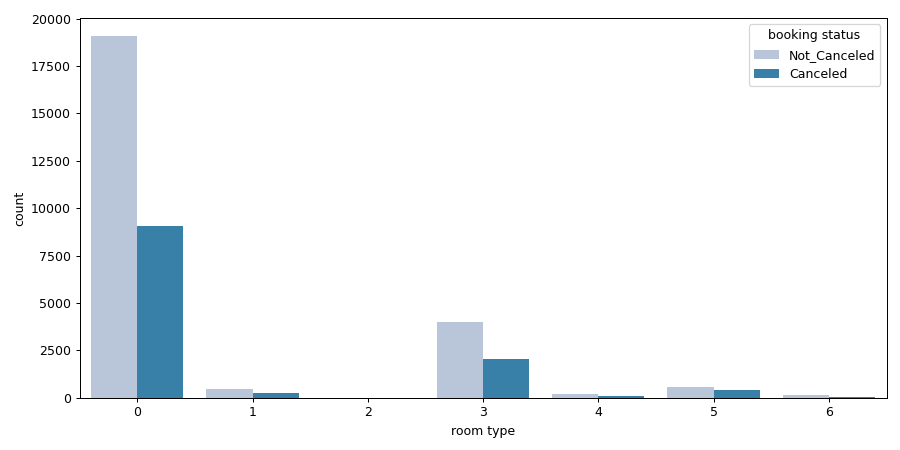

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="room type",hue="booking status",palette="PuBu")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


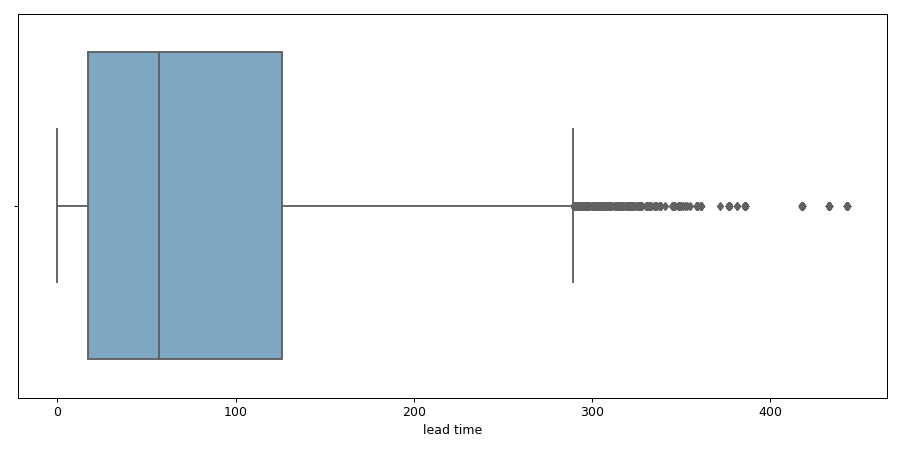

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x="lead time",palette="PuBu")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


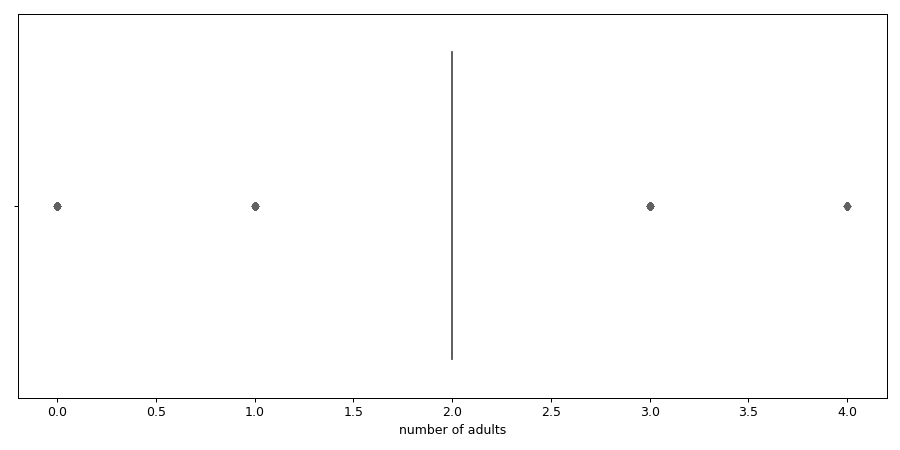

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x="number of adults",palette="PuBu")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


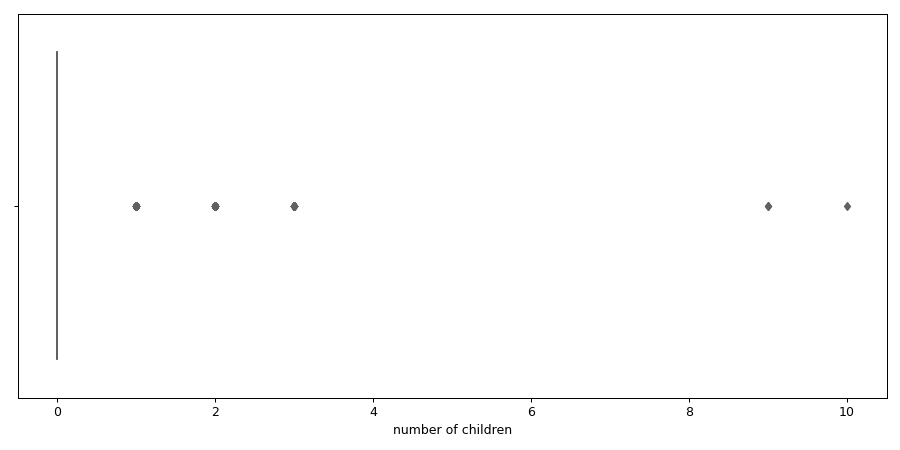

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x="number of children",palette="PuBu")
plt.tight_layout()
plt.show()

In [25]:
df = df[df["number of children"] <= 3]
df["number of children"].unique()

array([1, 0, 2, 3], dtype=int64)

<div style= "padding: 30px ;
             color :powderblue ;
             margin : 10px ; 
             font-family: verdana; 
             font-size: 200%; 
             display:fill; 
             border: 4px solid powderblue; 
             overflow:hidden; 
             font-weight:400; 
             background-color:black ; 
             text-align:center;">
    <b>data spliting and model trainning</b>

</div>

In [26]:
model=linear_model.LogisticRegression(max_iter=10000)

In [27]:
x=df.drop("booking status",axis=1)
y=df["booking status"]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
model.fit(x_train, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8091497864131184
